Import Libraries 

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [45]:
sales_df = pd.read_csv("./vgsales.csv")
developers_df = pd.read_csv("./video-games-developers.csv")

In [46]:
sales_df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [47]:
developers_df.head(5)

,Developer,City,Administrative division,Country,Est.,"Notable games, series or franchises",Notes
0,0verflow,Tokyo,NaN,Japan,1997,School DaysSummer DaysCross Days,Visual Novel brand (both developer and publisher)
1,11 bit studios,Warsaw,Masovian Voivodeship,Poland,2010,Frostpunk,Indie developer/publisher
2,1C Company,Moscow,NaN,Russia,1991,King's Bounty: Warriors of the North,Game localization. The game development subsid...
3,1-Up Studio,Tokyo,NaN,Japan,2000,Mother 3,Subsidiary of Nintendo. Formed by former emplo...
4,2K Czech,Brno,NaN,Czech Republic,1997,MafiaMafia II,Former subsidiary of 2K Games; previously know...


In [48]:
# Merging dataframes 
df = pd.merge(sales_df, developers_df[['Developer', 'Country']], left_on='Publisher', right_on='Developer', how='left')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer,Country
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,Japan
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,Japan
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,Japan
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,Japan
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,Japan


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
 11  Developer     9195 non-null   object 
 12  Country       9195 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.6+ MB


Data Cleaning

In [50]:
# Checking for null values
df.isnull().sum()

Rank               0
Name               0
Platform           0
Year             271
Genre              0
Publisher         58
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Developer       7403
Country         7403
dtype: int64

In [51]:
# Dropping null values
df = df.dropna(subset=['Year', 'Publisher', 'Developer', 'Country'])


In [52]:
# Checking for duplicated values
df.duplicated().sum()

np.int64(0)

EDA

Release of Games by Year

In [53]:
# Group by Year and count unique platforms for each year
platform_counts = df.groupby('Year')['Platform'].nunique()

# Identify the maximum count of unique platforms
max_platforms = platform_counts.max()

# Find years where the number of unique platforms equals the maximum count
years_with_max_platforms = platform_counts[platform_counts == max_platforms].index.tolist()

# Display the years
print("Years with the most platforms having game releases:", years_with_max_platforms)


Years with the most platforms having game releases: [2013.0]


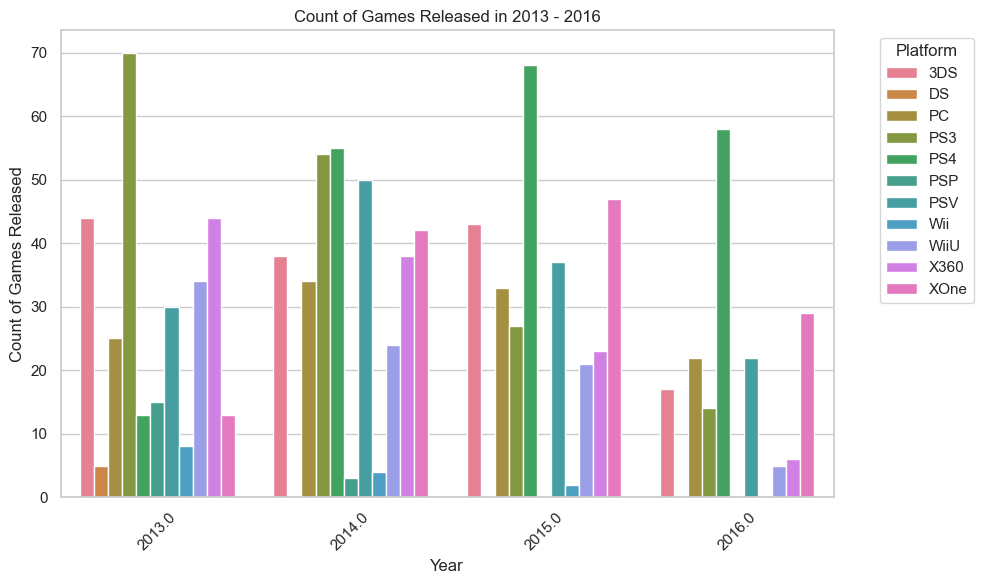

In [66]:
# Filter the DataFrame for years between 2013 and 2016
df_filtered = df[(df['Year'] >= 2013) & (df['Year'] <= 2016)]

# Group by Year and Platform to get the count
years_sales = df_filtered.groupby(['Year', 'Platform']).agg({'Global_Sales': 'count'}).reset_index()
years_sales.columns = ['Year', 'Platform', 'Count']
# Set the style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=years_sales, x='Year', y='Count', hue='Platform')

# Add titles and labels
plt.title('Count of Games Released in 2013 - 2016')
plt.xlabel('Year')
plt.ylabel('Count of Games Released')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Games by Sales Number

In [55]:
# Finding the Global Sales per year per platform
total_sales = df.groupby(['Platform', 'Year']).agg({'Global_Sales': 'sum'}).reset_index()
total_sales.sort_values('Global_Sales', ascending=False, inplace=True)
total_sales.head(5)

,Platform,Year,Global_Sales
190,Wii,2009.0,177.31
125,PS2,2002.0,142.29
127,PS2,2004.0,142.29
189,Wii,2008.0,139.43
187,Wii,2006.0,136.65


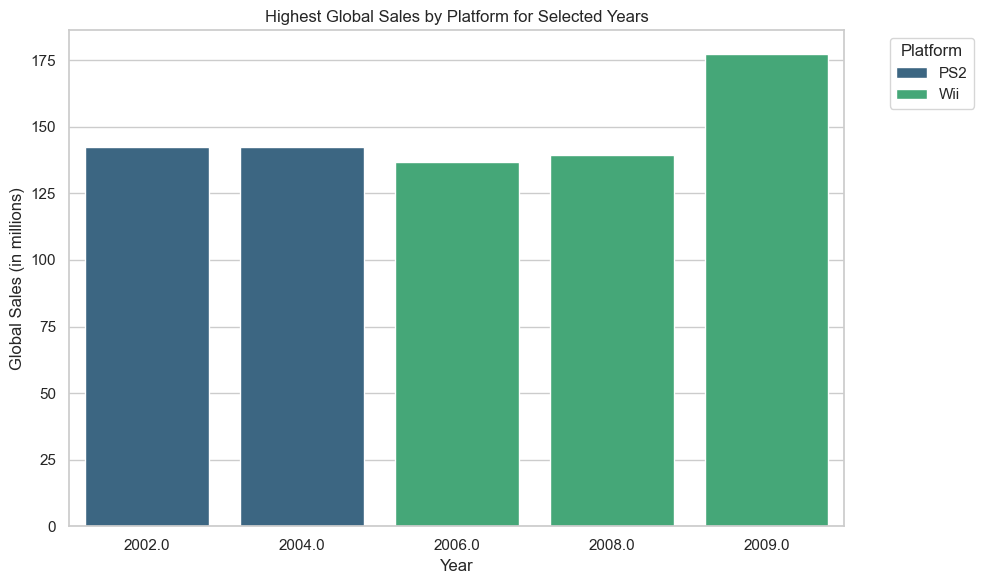

In [56]:
# Create a bar plot with years on the x-axis and platforms as bars
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales.head(), x='Year', y='Global_Sales', hue='Platform', palette='viridis')

# Add titles and labels
plt.title('Highest Global Sales by Platform for Selected Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [57]:
# Finding the total Global Sale per platform
highest_platforms = total_sales.groupby(['Platform']).agg({'Global_Sales': 'sum'}).reset_index()
highest_platforms.sort_values('Global_Sales', ascending=False, inplace=True)
highest_platforms.head()

,Platform,Global_Sales
14,PS2,833.39
23,Wii,779.08
15,PS3,726.29
3,DS,682.11
25,X360,623.91


/var/folders/51/x0s_18xd3zbbzj6wr9lx_q580000gn/T/ipykernel_88044/1142497936.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')


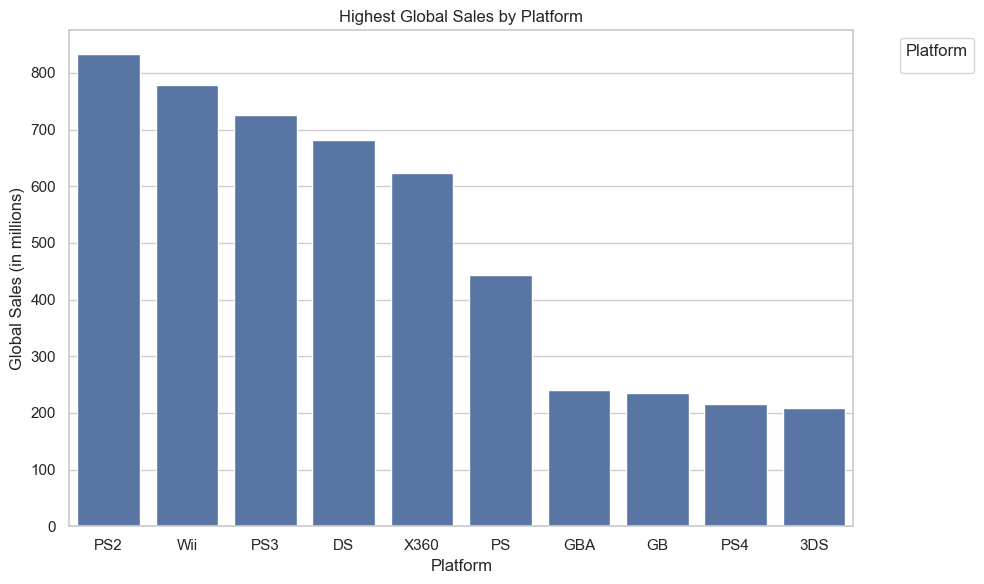

In [58]:
# Create a bar plot with years on the x-axis and platforms as bars
plt.figure(figsize=(10, 6))
sns.barplot(data=highest_platforms.head(10), x='Platform', y='Global_Sales')

# Add titles and labels
plt.title('Highest Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Sales by Region

In [59]:
# Find Sales in each Region by Year
geo = df.groupby(['Year']).agg({'NA_Sales': 'sum',
 'JP_Sales': 'sum',
 'EU_Sales': 'sum',
 'Other_Sales': 'sum',
 'Global_Sales': 'sum'})
geo = geo.sort_values('Year', ascending=True)
geo.head(10)

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.59,0.00,0.67,0.12,11.38
1981.0,16.04,0.00,0.94,0.16,17.19
1982.0,20.23,0.00,1.24,0.24,21.69
1983.0,7.30,8.10,0.77,0.14,16.29
1984.0,32.83,11.46,1.96,0.67,46.93
1985.0,33.73,13.08,4.74,0.92,52.46
1986.0,9.62,13.10,2.25,1.84,26.80
1987.0,7.42,5.73,1.35,0.20,14.74
1988.0,23.67,8.90,6.59,0.99,40.16


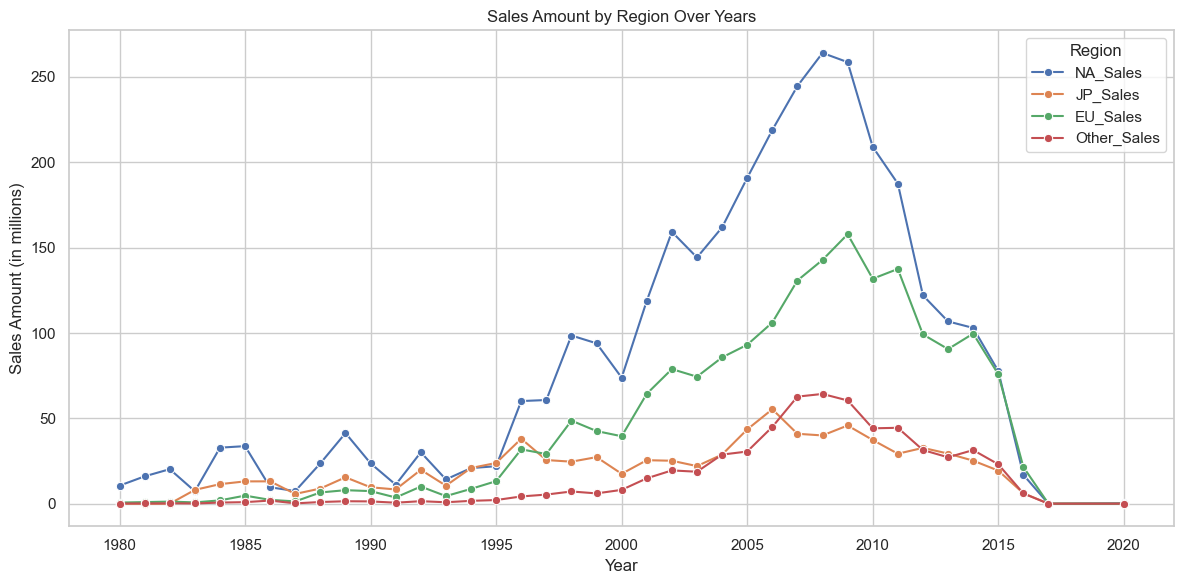

In [60]:
geo_melted = geo.reset_index().melt(id_vars='Year', value_vars=['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales'],
                           var_name='Region', value_name='Sales')

# Set the style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=geo_melted, x='Year', y='Sales', hue='Region', marker='o')

# Add titles and labels
plt.title('Sales Amount by Region Over Years')
plt.xlabel('Year')
plt.ylabel('Sales Amount (in millions)')
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

Sales by Genre

In [61]:
# Find Total Sales in each Genre
genre = df.groupby(['Genre']).agg({'NA_Sales': 'sum',
 'JP_Sales': 'sum',
 'EU_Sales': 'sum',
 'Other_Sales': 'sum',
 'Global_Sales': 'sum'}) 
genre = genre.sort_values('Global_Sales', ascending=False)
genre.head()

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,583.53,77.52,352.58,119.40,1133.58
Sports,547.51,61.80,299.70,102.28,1011.44
Shooter,427.77,26.82,242.90,81.92,779.66
Platform,398.46,122.30,176.46,45.41,742.87
Role-Playing,258.96,215.68,153.86,47.07,675.63


Publisher by Year

In [70]:
# Find Sales for each Publisher by Year
top_publishers = [
    'Nintendo', 
    'Sony Computer Entertainment',
    'Microsoft Game Studios',
    'Konami Digital Entertainment',
    'Electronic Arts'
]
publisher_years = df.groupby(['Year','Publisher']).agg({
 'Global_Sales': 'sum'}) 
publisher_years.reset_index(inplace=True)
publisher_years = publisher_years.loc[publisher_years['Publisher'].isin(top_publishers)]
publisher_years

,Year,Publisher,Global_Sales
10,1983.0,Nintendo,10.96
13,1984.0,Nintendo,45.56
17,1985.0,Nintendo,49.95
21,1986.0,Nintendo,16.18
25,1987.0,Nintendo,11.95
...,...,...,...
640,2015.0,Nintendo,27.08
646,2015.0,Sony Computer Entertainment,11.01
660,2016.0,Electronic Arts,12.25
667,2016.0,Nintendo,3.47


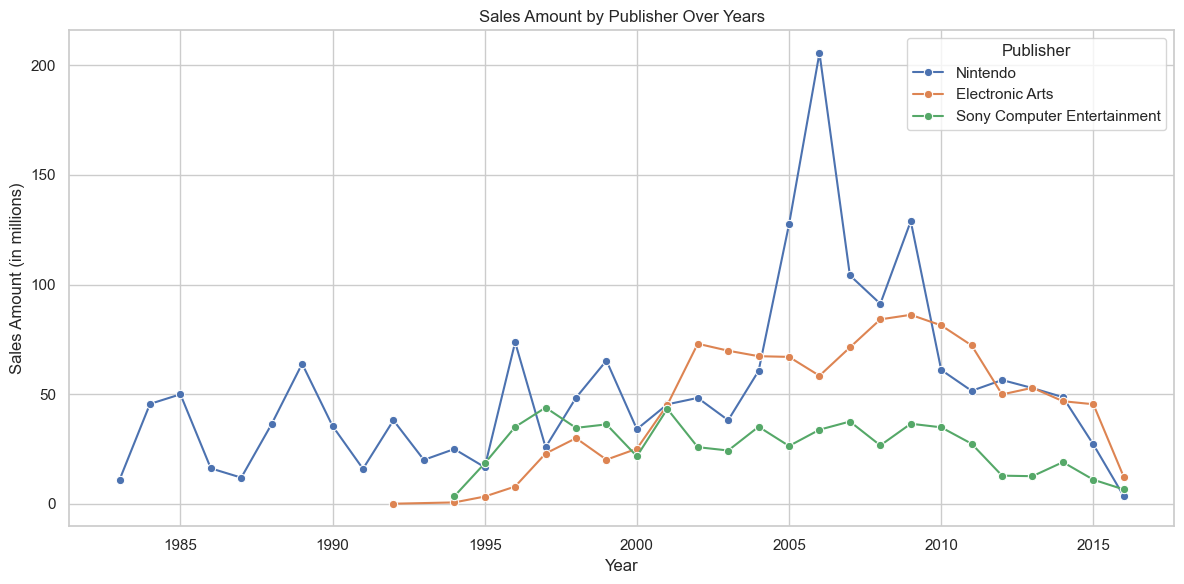

In [63]:
# Set the style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=publisher_years, x='Year', y='Global_Sales', hue='Publisher', marker='o')

# Add titles and labels
plt.title('Sales Amount by Publisher Over Years')
plt.xlabel('Year')
plt.ylabel('Sales Amount (in millions)')
plt.legend(title='Publisher')
plt.tight_layout()

# Show the plot
plt.show()

Publisher by Regions

In [64]:
# Find Sales for each Publisher by Country
publisher_region = df.groupby(['Country','Publisher']).agg({
 'Global_Sales': 'sum'}) 
publisher_region.reset_index(inplace=True)
publisher_region = publisher_region.loc[publisher_region['Publisher'].isin(top_publishers)]
publisher_region

,Country,Publisher,Global_Sales
31,Japan,Nintendo,1784.43
61,United States,Electronic Arts,1093.39
76,United States,Sony Computer Entertainment,607.28


Exporting dataset

In [65]:
df.to_csv('./videogame.csv', index=False)